In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

file_path = 'ks-projects.csv'

In [2]:
df = pd.read_csv(file_path,encoding='cp1252',low_memory=False)
df.columns = df.columns.str.strip()
df = df.drop(['currency','deadline','launched','country','usd pledged'],axis=1)
df["goal"] = pd.to_numeric(df['goal'],errors="coerce")
df["pledged"] = pd.to_numeric(df['pledged'],errors="coerce")
df["backers"] = pd.to_numeric(df['backers'],errors="coerce")

In [3]:
df = df[df['state'].isin(['failed'])]
df = df[['main_category','goal','pledged','backers']]
df = df[(df['pledged'] >= 20000) & (df['backers'] >= 100)]

In [4]:
df['pct_pledged'] = (df['pledged']/df['goal'])
df = df.sort_values(['main_category','pct_pledged'],ascending=[True,False])
df.head(10)

,main_category,goal,pledged,backers,pct_pledged
246321,Art,60000.0,52565.25,294.0,0.876088
13415,Art,25000.0,21310.00,172.0,0.852400
295027,Art,35000.0,27630.24,185.0,0.789435
180969,Art,50000.0,37621.97,552.0,0.752439
280291,Art,52000.0,33485.00,336.0,0.643942
161313,Art,35000.0,20374.99,130.0,0.582143
289146,Art,100000.0,54387.00,133.0,0.543870
309141,Art,77777.0,39206.49,136.0,0.504088
620,Art,100000.0,50230.00,257.0,0.502300
171126,Art,80000.0,27413.00,115.0,0.342662


In [5]:
df['funding_status'] = np.select([df['pct_pledged'] == 1,
                                  (df['pct_pledged'] > 0.75)&(df['pct_pledged']<1),
                                  df['pct_pledged'] < 0.75],
                                 ["Fully funded",
                                  "Nearly funded",
                                  "Not nearly funded"],default="unknown")
df.head(10)

,main_category,goal,pledged,backers,pct_pledged,funding_status
246321,Art,60000.0,52565.25,294.0,0.876088,Nearly funded
13415,Art,25000.0,21310.00,172.0,0.852400,Nearly funded
295027,Art,35000.0,27630.24,185.0,0.789435,Nearly funded
180969,Art,50000.0,37621.97,552.0,0.752439,Nearly funded
280291,Art,52000.0,33485.00,336.0,0.643942,Not nearly funded
161313,Art,35000.0,20374.99,130.0,0.582143,Not nearly funded
289146,Art,100000.0,54387.00,133.0,0.543870,Not nearly funded
309141,Art,77777.0,39206.49,136.0,0.504088,Not nearly funded
620,Art,100000.0,50230.00,257.0,0.502300,Not nearly funded
171126,Art,80000.0,27413.00,115.0,0.342662,Not nearly funded


<Axes: xlabel='funding_status', ylabel='backers'>

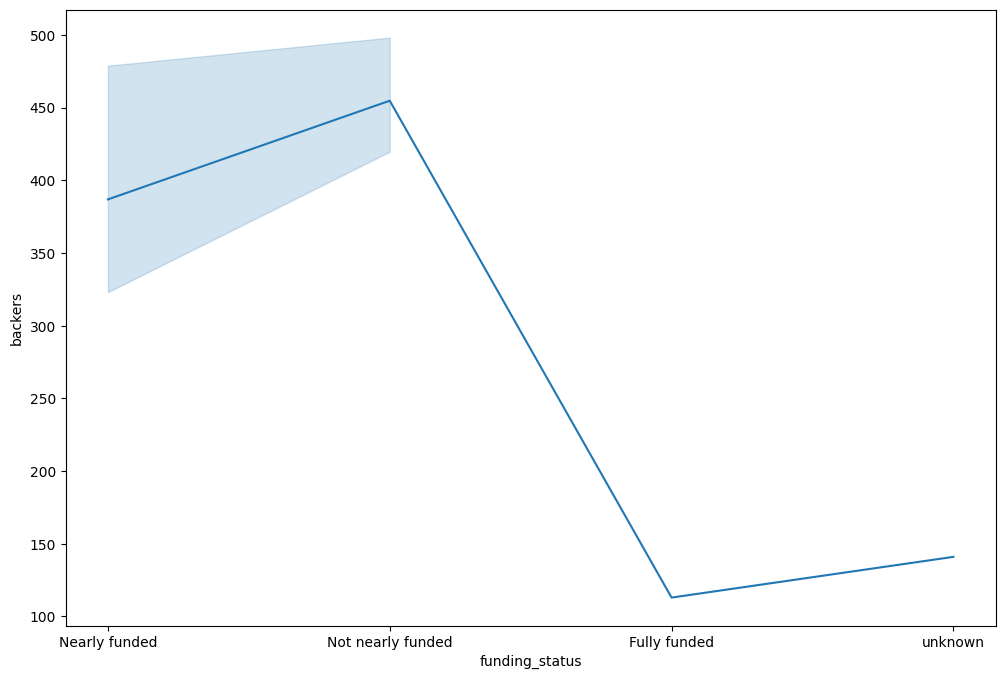

In [6]:
plt.figure(figsize=(12,8))
sns.lineplot(df,x='funding_status',y='backers')